In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import plotly.express as px
from models import *


In [2]:
path = r"E:\Experments\PS_20174392719_1491204439457_log.csv"
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
data['type'].value_counts
print(data.shape)

(6362620, 11)


In [7]:
a = data['type'].value_counts()
quantity = a.values
transication_type = a.index
print(quantity)
print(transication_type)

[2237500 2151495 1399284  532909   41432]
Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')


In [8]:
px.pie(data, 
             values=quantity, 
             names=transication_type,hole = 0.5, 
             title="Distribution of Transaction Type")

In [9]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

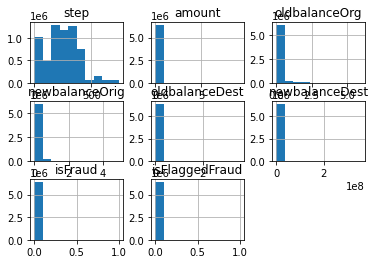

In [10]:
data.hist()

<AxesSubplot:>

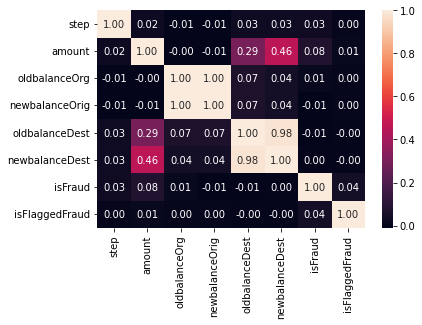

In [11]:
data_corr = data.corr()
sns.heatmap(data_corr,annot=True,fmt=".2f")

In [12]:
new_data = data.drop(["nameOrig","nameDest"], axis=1)
model = FraudD(new_data,type_object_encod="labelEncoder")

model.encoding()
model.normlization()
train,train_y,test,test_y = model.data_spliting("isFraud",0.8)

e:\Experments\AI\AI\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



['type']
             step  type    amount  oldbalanceOrg  newbalanceOrig  \
0        0.000000     3  0.000106       0.002855        0.003233   
1        0.000000     3  0.000020       0.000357        0.000391   
2        0.000000     4  0.000002       0.000003        0.000000   
3        0.000000     1  0.000002       0.000003        0.000000   
4        0.000000     3  0.000126       0.000697        0.000603   
...           ...   ...       ...            ...             ...   
5090092  0.477089     1  0.001960       0.001377        0.000000   
5090093  0.477089     3  0.000005       0.000000        0.000000   
5090094  0.477089     0  0.003548       0.000869        0.007659   
5090095  0.477089     1  0.001747       0.000664        0.000000   
5090096  0.477089     1  0.001401       0.008340        0.007411   

         oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0              0.000000        0.000000      0.0             0.0  
1              0.000000        0.000000 

e:\Experments\AI_projects\fraud_detection\models.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

e:\Experments\AI_projects\fraud_detection\models.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
print(train.shape,train_y.shape,test.shape,test_y.shape)
accuracy = model.logastic_reg(train,train_y,test,test_y,300)
print(accuracy)

(5090097, 8) (5090097,) (1272524, 8) (1272524,)
[LibLinear]Accuracy:  0.9967906302749496 %
0.9967906302749496


In [14]:
ac = model.svm(train,train_y,test,test_y,300)
print(ac)

[LibSVM]

e:\Experments\AI\AI\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Accuracy:  0.5688772864008852 %
0.5688772864008852
